In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import random
import time


# Import API key
from api_keys import api_key

API code

In [2]:
# function to run API request
def mi_api(cnt):
    MarketIndex=('BTC','LTC','NMC','PPC','DOGE','XDG','XBT','GRC','XPM', 'XRP'
                 ,'NXT','AUR','DASH','NEO','MZC','XMR','XEM','POT','TIT','XVG'
                ,'XLM','VTC','ETH','ETC','USDT','ZEC','BCH','EOS')
    return MarketIndex[cnt]

    
# dictionary to hold the json result    

coinDict = {}
# setup URL
url = "https://www.alphavantage.co/query?"
function = "TIME_SERIES_WEEKLY"
    
i = 0
oldtime = time.time()
print("API procedure star at: ", time.ctime())
while True:  
    if i < 28:
        Market = mi_api(i)
        query_url = f"{url}function={function}&symbol={Market}&apikey={api_key}"
        coinDict.update({Market : requests.get(query_url).json()}  )          
        time.sleep(65)
        i += 1 
        print("API procedure complete at: ", time.ctime(), Market)
    if i == 28:  
        break
print("API procedures complete at: ", time.ctime())


procedure complete:  1
procedure complete:  2
procedure complete:  3
procedure complete:  4
procedure complete:  5
procedure complete:  6
procedure complete:  7
procedure complete:  8
procedure complete:  9
procedure complete:  10
procedure complete:  11
procedure complete:  12
procedure complete:  13
procedure complete:  14
procedure complete:  15
procedure complete:  16
procedure complete:  17
procedure complete:  18
procedure complete:  19
procedure complete:  20
procedure complete:  21
procedure complete:  22
procedure complete:  23
procedure complete:  24
procedure complete:  25
procedure complete:  26
procedure complete:  27


In [3]:
#create a dataframe for dictionary
coinT=pd.DataFrame()
coinT['Symbol'] = ''
coinT['Week'] = ''
coinT['Open'] = ''
coinT['High'] = ''
coinT['Low'] = ''
coinT['Close'] = ''
coinT['Volume'] = ''

# unpack dictionary result from Json and add to dataframe
for key in coinDict:
    try:
        for lkey in coinDict[key]['Weekly Time Series']:
            coinT= coinT.append(pd.Series([key, lkey
              , coinDict[key]['Weekly Time Series'][lkey]['1. open']
              ,coinDict[key]['Weekly Time Series'][lkey]['2. high']
              ,coinDict[key]['Weekly Time Series'][lkey]['3. low']
              ,coinDict[key]['Weekly Time Series'][lkey]['4. close']
              ,coinDict[key]['Weekly Time Series'][lkey]['5. volume']
                                      ], index=coinT.columns), ignore_index=True)
            #print(key, lkey)
            
    except (KeyError, IndexError):
        print('error data not added to dataframe: ', key)
        

#save into CSV
coinT.to_csv("output/CoinIndex.csv", index=False, header=True)

# view data in datframe
coinT.head()

error data not added to dataframe:  NMC
error data not added to dataframe:  DOGE
error data not added to dataframe:  XDG
error data not added to dataframe:  XBT
error data not added to dataframe:  XPM
error data not added to dataframe:  NXT
error data not added to dataframe:  DASH
error data not added to dataframe:  MZC
error data not added to dataframe:  XMR
error data not added to dataframe:  XVG
error data not added to dataframe:  USDT
error data not added to dataframe:  ZEC


,Symbol,Week,Open,High,Low,Close,Volume
0,BTC,2001-08-24,0.0000,0.0000,0.0000,0.0700,0
1,BTC,2000-11-17,0.0000,0.0000,0.0000,3.0000,0
2,BTC,2000-08-15,0.0000,0.0000,0.0000,2.5000,0
3,BTC,2000-08-11,0.0000,0.0000,0.0000,2.1875,0
4,LTC,2019-03-29,45.1700,46.4400,44.8393,45.8000,929365


In [6]:
# turn to numeric, calculate % delta between open and close
coinT["Date"]=coinT['Week'].astype('datetime64[ns]')
coinT["Open"] = coinT["Open"].apply(pd.to_numeric, downcast='float', errors='coerce')
coinT["High"] = coinT["High"].apply(pd.to_numeric, downcast='float', errors='coerce')
coinT["Low"] = coinT["Low"].apply(pd.to_numeric, downcast='float', errors='coerce')
coinT["Close"] = coinT["Close"].apply(pd.to_numeric, downcast='float', errors='coerce')
coinT["Volume"] = coinT["Volume"].apply(pd.to_numeric, downcast='float', errors='coerce')
coinT["Delta"] = coinT["Close"]- coinT["Open"]
coinT["Percent Delta"] = coinT["Delta"]/ coinT["Open"]
   
coinT.head()

,Symbol,Week,Open,High,Low,Close,Volume,Date,Delta,Percent Delta
0,BTC,2001-08-24,0.000000,0.000000,0.000000,0.070000,0.0,2001-08-24,0.070000,inf
1,BTC,2000-11-17,0.000000,0.000000,0.000000,3.000000,0.0,2000-11-17,3.000000,inf
2,BTC,2000-08-15,0.000000,0.000000,0.000000,2.500000,0.0,2000-08-15,2.500000,inf
3,BTC,2000-08-11,0.000000,0.000000,0.000000,2.187500,0.0,2000-08-11,2.187500,inf
4,LTC,2019-03-29,45.169998,46.439999,44.839298,45.799999,929365.0,2019-03-29,0.630001,0.013947


In [8]:
# Obtain the x and y coordinates for each symbol:  'BTC','LTC','NMC','PPC','DOGE','XDG','XBT','GRC','XPM', 'XRP'
#                 ,'NXT','AUR','DASH','NEO','MZC','XMR','XEM','POT','TIT','XVG'
#                ,'XLM','VTC','ETH','ETC','USDT','ZEC','BCH','EOS')
BTC= coinT[coinT['Symbol'] == 'BTC']
LTC= coinT[coinT['Symbol'] == 'LTC']
#NMC= coinT[coinT['Symbol'] == 'NMC']
PPC= coinT[coinT['Symbol'] == 'PPC']
#DOGE= coinT[coinT['Symbol'] == 'DOGE']
#XDG= coinT[coinT['Symbol'] == 'XDG']
#XBT= coinT[coinT['Symbol'] == 'XBT']
GRC= coinT[coinT['Symbol'] == 'GRC']
#XPM= coinT[coinT['Symbol'] == 'XPM']
XRP= coinT[coinT['Symbol'] == ' XRP']
#NXT= coinT[coinT['Symbol'] == 'NXT']
AUR= coinT[coinT['Symbol'] == 'AUR']
#DASH= coinT[coinT['Symbol'] == 'DASH']
NEO= coinT[coinT['Symbol'] == 'NEO']
#MZC= coinT[coinT['Symbol'] == 'MZC']
#XMR= coinT[coinT['Symbol'] == 'XMR']
XEM= coinT[coinT['Symbol'] == 'XEM']
POT= coinT[coinT['Symbol'] == 'POT']
TIT= coinT[coinT['Symbol'] == 'TIT']
#XVG= coinT[coinT['Symbol'] == 'XVG']
XLM= coinT[coinT['Symbol'] == 'XLM']
VTC= coinT[coinT['Symbol'] == 'VTC']
ETH= coinT[coinT['Symbol'] == 'ETH']
ETC= coinT[coinT['Symbol'] == 'ETC']
#USDT= coinT[coinT['Symbol'] == 'USDT']
#ZEC= coinT[coinT['Symbol'] == 'ZEC']
BCH= coinT[coinT['Symbol'] == 'BCH']
EOS= coinT[coinT['Symbol'] == 'EOS']



In [9]:
# generate random colors.  


def generate_new_color(existing_colors,pastel_factor = .5):
    max_distance = None
    best_color = None
    for i in range(0,100):
        color = get_random_color(pastel_factor = pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color,c) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color


def get_random_color(pastel_factor = 0.5):
    return [(x+pastel_factor)/(1.0+pastel_factor) for x in [random.uniform(0,1.0) for i in [1,2,3]]]



def color_distance(c1,c2):
    return sum([abs(x[0]-x[1]) for x in zip(c1,c2)])


In [10]:
colors = []
for i in range(0,28):
    colors.append(generate_new_color(colors,pastel_factor = 0.9))

Text(0, 0.5, 'Daily % Change')

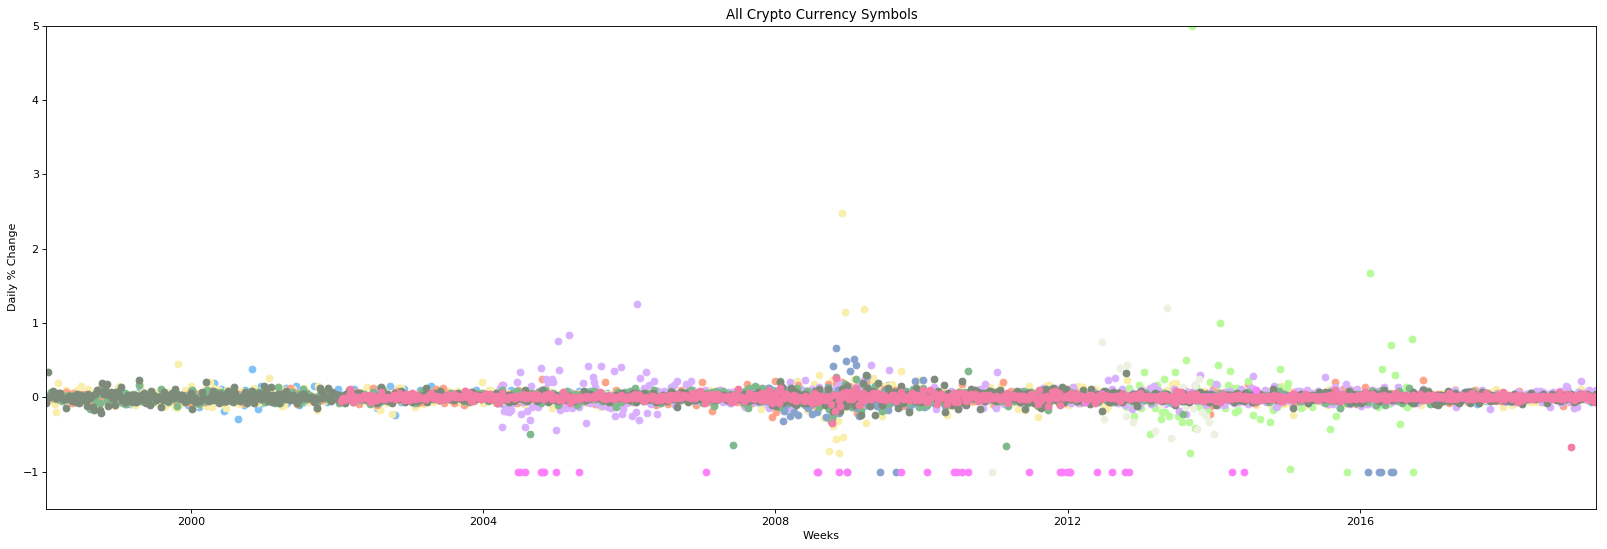

In [20]:
#Plot all

color = list(np.random.choice(range(256), size=12))

# Build the scatter plots for each city types
plt.figure(figsize=(25, 8), dpi= 80, facecolor='w', edgecolor='k')




plt.plot(BTC['Date'], BTC['Percent Delta'], color=colors[1], linewidth=0, marker='o')
plt.plot(LTC['Date'], LTC['Percent Delta'], color=colors[2], linewidth=0, marker='o')
#plt.plot(NMC['Date'], NMC['Percent Delta'], color=colors[3], linewidth=0, marker='o')
plt.plot(PPC['Date'], PPC['Percent Delta'], color=colors[4], linewidth=0, marker='o')
#plt.plot(DOGE['Date'], DOGE['Percent Delta'], color=colors[5], linewidth=0, marker='o')
#plt.plot(XDG['Date'], XDG['Percent Delta'], color=colors[6], linewidth=0, marker='o')
#plt.plot(XBT['Date'], XBT['Percent Delta'], color=colors[7], linewidth=0, marker='o')
plt.plot(GRC['Date'], GRC['Percent Delta'], color=colors[8], linewidth=0, marker='o')
#plt.plot(XPM['Date'], XPM['Percent Delta'], color=colors[9], linewidth=0, marker='o')
plt.plot( XRP['Date'],  XRP['Percent Delta'], color=colors[10], linewidth=0, marker='o')
#plt.plot(NXT['Date'], NXT['Percent Delta'], color=colors[11], linewidth=0, marker='o')
plt.plot(AUR['Date'], AUR['Percent Delta'], color=colors[12], linewidth=0, marker='o')
#plt.plot(DASH['Date'], DASH['Percent Delta'], color=colors[13], linewidth=0, marker='o')
plt.plot(NEO['Date'], NEO['Percent Delta'], color=colors[14], linewidth=0, marker='o')
#plt.plot(MZC['Date'], MZC['Percent Delta'], color=colors[15], linewidth=0, marker='o')
#plt.plot(XMR['Date'], XMR['Percent Delta'], color=colors[16], linewidth=0, marker='o')
plt.plot(XEM['Date'], XEM['Percent Delta'], color=colors[17], linewidth=0, marker='o')
plt.plot(POT['Date'], POT['Percent Delta'], color=colors[18], linewidth=0, marker='o')
#plt.plot(TIT['Date'], TIT['Percent Delta'], color=colors[19], linewidth=0, marker='o')
#plt.plot(XVG['Date'], XVG['Percent Delta'], color=colors[20], linewidth=0, marker='o')
plt.plot(XLM['Date'], XLM['Percent Delta'], color=colors[21], linewidth=0, marker='o')
plt.plot(VTC['Date'], VTC['Percent Delta'], color=colors[22], linewidth=0, marker='o')
plt.plot(ETH['Date'], ETH['Percent Delta'], color=colors[23], linewidth=0, marker='o')
plt.plot(ETC['Date'], ETC['Percent Delta'], color=colors[24], linewidth=0, marker='o')
#plt.plot(USDT['Date'], USDT['Percent Delta'], color=colors[25], linewidth=0, marker='o')
#plt.plot(ZEC['Date'], ZEC['Percent Delta'], color=colors[26], linewidth=0, marker='o')
plt.plot(BCH['Date'], BCH['Percent Delta'], color=colors[27], linewidth=0, marker='o')
#plt.plot(EOS['Date'], EOS['Percent Delta'], color=colors[28], linewidth=0, marker='o')


x_lim = coinT['Date'].max()
y_lim = coinT[(coinT['Percent Delta']!=np.inf) & (coinT['Symbol']!='TIT')]['Percent Delta'].max()
x_min = coinT['Date'].min()
y_min = coinT[coinT['Percent Delta'] !=np.inf]['Percent Delta'].min()

plt.xlim(x_min, x_lim)
plt.ylim(y_min -.5, y_lim)

# Create a legend

plt.title("All Crypto Currency Symbols")
plt.xlabel("Weeks")
plt.ylabel("Daily % Change")

# Save Figure
#plt.savefig("../output_data/MaxTemp.png", pad_inches = 3, bbox_inches='tight')

Text(0, 0.5, 'Daily % Change')

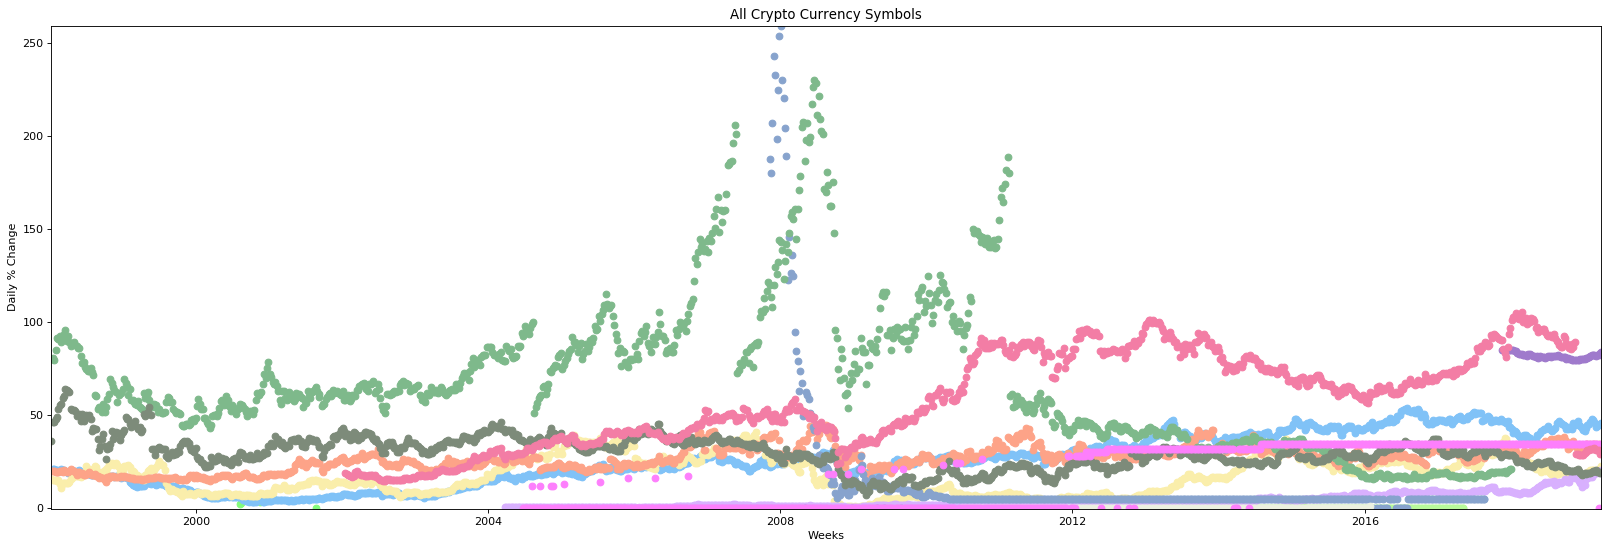

In [23]:

# Build the scatter plots for each city types
plt.figure(figsize=(25, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(BTC['Date'], BTC['Close'], color=colors[1], linewidth=0, marker='o')
plt.plot(LTC['Date'], LTC['Close'], color=colors[2], linewidth=0, marker='o')
plt.plot(PPC['Date'], PPC['Close'], color=colors[4], linewidth=0, marker='o')
plt.plot(GRC['Date'], GRC['Close'], color=colors[8], linewidth=0, marker='o')
plt.plot( XRP['Date'],  XRP['Close'], color=colors[10], linewidth=0, marker='o')
plt.plot(AUR['Date'], AUR['Close'], color=colors[12], linewidth=0, marker='o')
plt.plot(NEO['Date'], NEO['Close'], color=colors[14], linewidth=0, marker='o')
plt.plot(XEM['Date'], XEM['Close'], color=colors[17], linewidth=0, marker='o')
plt.plot(POT['Date'], POT['Close'], color=colors[18], linewidth=0, marker='o')
plt.plot(XLM['Date'], XLM['Close'], color=colors[21], linewidth=0, marker='o')
plt.plot(VTC['Date'], VTC['Close'], color=colors[22], linewidth=0, marker='o')
plt.plot(ETH['Date'], ETH['Close'], color=colors[23], linewidth=0, marker='o')
plt.plot(ETC['Date'], ETC['Close'], color=colors[24], linewidth=0, marker='o')
plt.plot(BCH['Date'], BCH['Close'], color=colors[27], linewidth=0, marker='o')


x_lim = coinT['Date'].max()
y_lim = coinT[(coinT['Close']!=np.inf) & (coinT['Symbol']!='TIT')]['Close'].max()
x_min = coinT['Date'].min()
y_min = coinT[coinT['Close'] !=np.inf]['Close'].min()

plt.xlim(x_min, x_lim)
plt.ylim(y_min -.5, y_lim)

# Create a legend

plt.title("All Crypto Currency Symbols")
plt.xlabel("Weeks")
plt.ylabel("Daily % Change")
